# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1. Is the distribution of body temperatures normal?

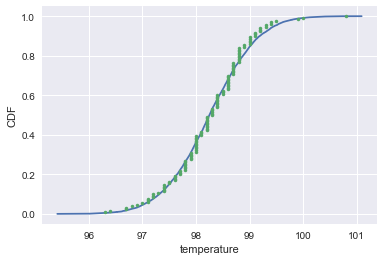

In [2]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x,y

sample_size = len(df.temperature)
sample_mean = np.mean(df.temperature)
sample_standard_dev =np.std(df.temperature)
                  
normal_dist = np.random.normal(sample_mean, size=10000, scale=sample_standard_dev)

x_norm, y_norm = ecdf(normal_dist)
x_data, y_data = ecdf(df['temperature'])

sns.set()
q1 = plt.plot(x_norm, y_norm)
q1 = plt.plot(x_data, y_data, marker='.', linestyle='none')
plt.xlabel('temperature')
plt.ylabel('CDF')
plt.show()

The sample looks to be close to normal, though not completely in line with a perfectly normal distribution, skewed a bit to the right of the curve.

### 2. Is the sample size large? Are the observations independent?

In [3]:
print('sample size: ', sample_size)
print('sample mean: ', sample_mean)
print('sample standard deviation: ', sample_standard_dev)

sample size:  130
sample mean:  98.24923076923078
sample standard deviation:  0.7303577789050377


The sample size is sufficiently large and, because each record is of a different person, independent of one another.

### 3. Is the true population mean really 98.6 degrees F?

It's appropriate to use a one sample test because we're comparing summary statistics of sample data with a single number, in this case the mean.
 
Because we do not know the standard deviation of the full population, it's appropriate to use the t-test.

Null Hypothesis: The average human body temperature is 98.6 degrees F.

In [4]:
from statsmodels.stats.weightstats import ztest
import scipy.stats as stats

print(ztest(df.temperature, value=98.6))
print(stats.ttest_1samp(df.temperature, 98.6))

(-5.4548232923645195, 4.9021570141012155e-08)
Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


The p -values are small and can thus reject the null hypothesis that the average body temperature is 98.6 degrees

### 4. Draw a small sample of size 10 from the data and repeat both tests.

In [5]:
sample_10 = np.random.choice(df.temperature, size=10)

print(ztest(sample_10,value=98.6))
print(stats.ttest_1samp(sample_10,98.6))

(-2.2435050988007483, 0.024864261432163758)
Ttest_1sampResult(statistic=-2.2435050988007483, pvalue=0.051547301061616757)


There is large variability each time you run it--smaller samples require a t-test.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [6]:
zscore = 1.96 # 95% Confidence level
sig = sample_standard_dev/np.sqrt(sample_size)
margin = abs(zscore*sig)

CI = [sample_mean - margin, sample_mean + margin]
print('95% Confidence Interval: ', CI)

95% Confidence Interval:  [98.123679804428193, 98.374781734033363]


Abnormal temperatures are below 98.1 and above 98.3 degrees F.

### 6. Is there a significant difference between males and females in normal temperature?

In [7]:
temp_f = np.array(df.temperature[df.gender=='F'])
temp_m = np.array(df.temperature[df.gender=='M'])

stats.ttest_ind(temp_f, temp_m)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

I used a two-sample t-test because the separated arrays are sufficiently large. The two genders do appear to be different with a p-value just under the .025 threshold. The graph below illustrates the stratification.

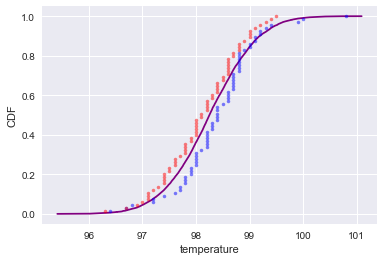

In [8]:
x_norm, y_norm = ecdf(normal_dist)
x_f, y_f = ecdf(temp_f)
x_m, y_m = ecdf(temp_m)

sns.set()
q1 = plt.plot(x_norm, y_norm, color='purple')
q1 = plt.plot(x_f, y_f, marker='.', linestyle='none', color='blue', alpha=.5)
q1 = plt.plot(x_m, y_m, marker='.', linestyle='none', color='red', alpha=.5)
plt.xlabel('temperature')
plt.ylabel('CDF')
plt.show()

Not only does the mean temperature differ, but a separation between genders would, at the very least, paint a more complete picture.